C:\Users\heave\AppData\Local\Temp\ipykernel_23540\410410566.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


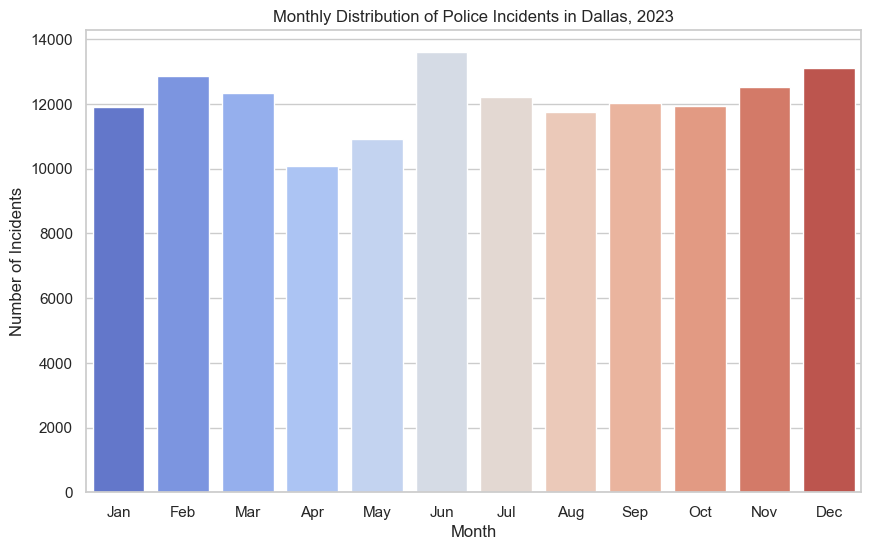

In [7]:
import mysql.connector
import pandas as pd

# Database connection parameters
config = {
    'user': 'root',
    'password': 'Jumpman1997_',
    'host': 'localhost',
    'database': 'police_incidents'
}

# SQL query 1
query = """
SELECT `Month1 of Occurence` as month, COUNT(*) as incident_count
FROM police_incidents
WHERE `Year of Incident` = 2023
GROUP BY `Month1 of Occurence`
ORDER BY month;
"""

# Connect to the database
cnx = mysql.connector.connect(**config)

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql(query, cnx)

# Close the database connection
cnx.close()
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='incident_count', data=df, palette='coolwarm')
plt.title('Monthly Distribution of Police Incidents in Dallas, 2023')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()



C:\Users\heave\AppData\Local\Temp\ipykernel_23540\4226489704.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, cnx)


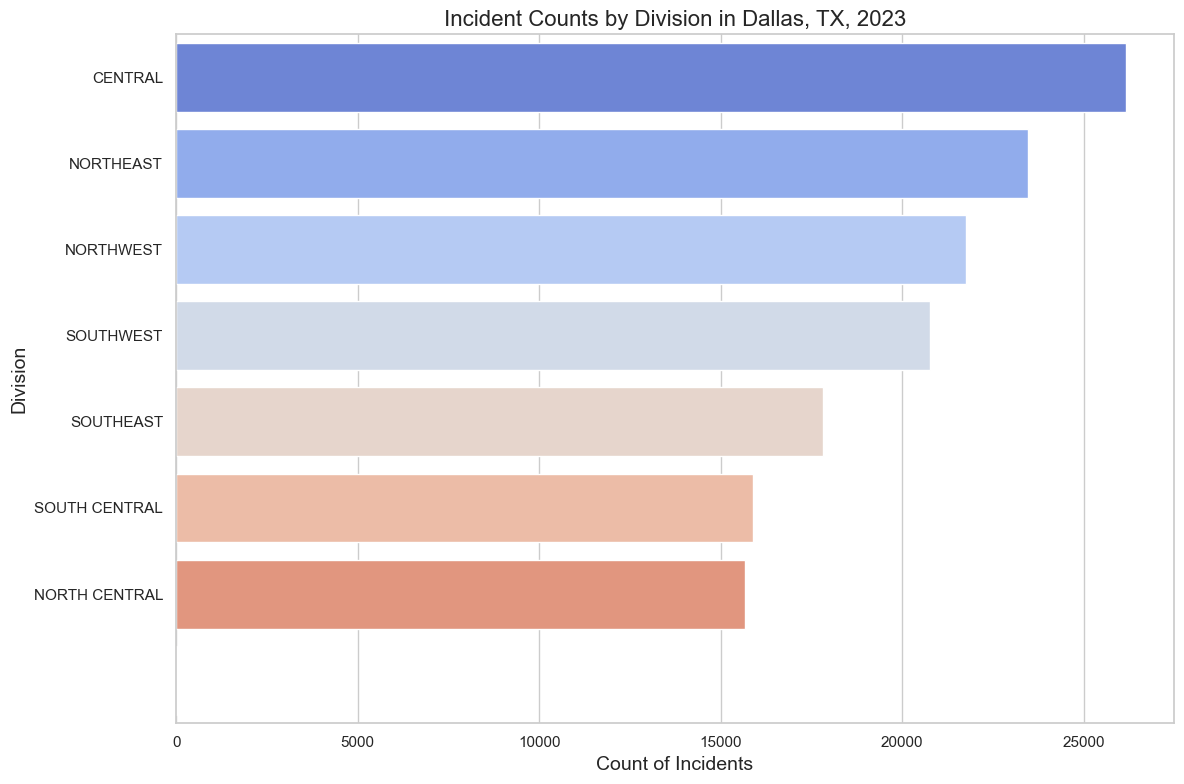

In [15]:
# Connect to the database
cnx = mysql.connector.connect(**config)

# SQL query 2
query = """
SELECT `Division`, COUNT(*) AS Incident_Count
FROM police_incidents
WHERE `City` = 'Dallas' AND `State` = 'TX' AND `Year of Incident` = 2023
GROUP BY `Division`
ORDER BY Incident_Count DESC;
"""

# Execute the query and fetch the results into a DataFrame
data = pd.read_sql(query, cnx)

# Close the database connection
cnx.close()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
sns.set_style("whitegrid")


plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Incident_Count', y='Division', data=data, palette='coolwarm')

# Add titles and labels
plt.title('Incident Counts by Division in Dallas, TX, 2023', fontsize=16)
plt.xlabel('Count of Incidents', fontsize=14)
plt.ylabel('Division', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\heave\AppData\Local\Temp\ipykernel_23540\4036932049.py:6: DtypeWarning: Columns (3,53,61) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/heave/Downloads/Police_Incidents_20240410.csv')


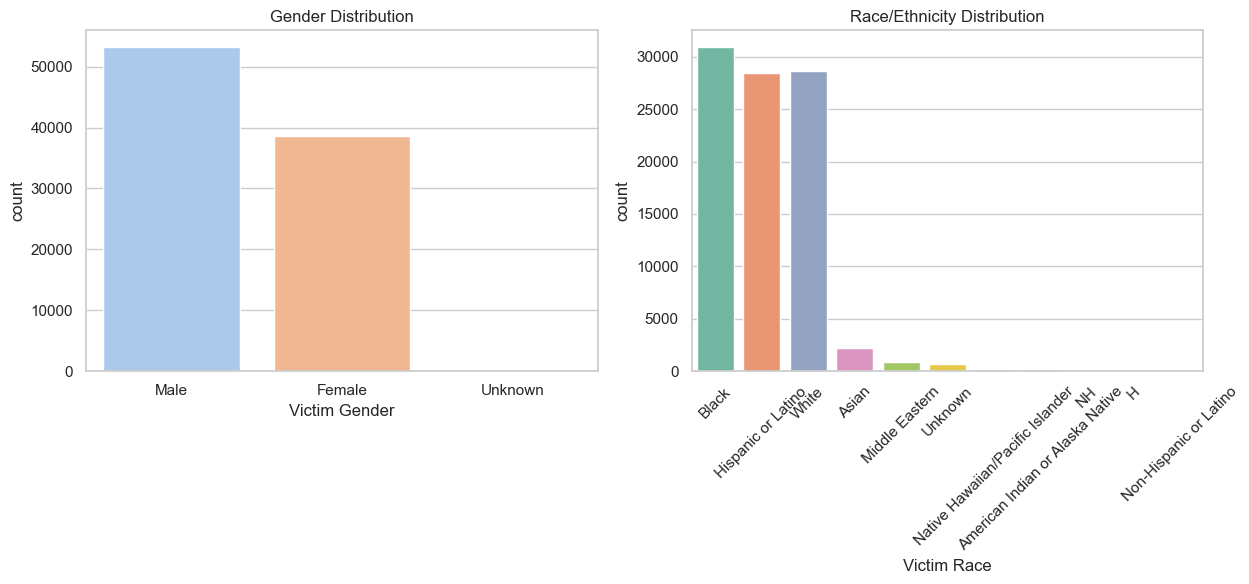

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('C:/Users/heave/Downloads/Police_Incidents_20240410.csv')

# Setup the figure and axes for a three-part visualization
plt.figure(figsize=(18, 6))  # Adjusted for better fit of three plots


# Gender distribution
plt.subplot(1, 3, 2)  # Second subplot for gender
sns.countplot(x='Victim Gender', data=data, palette='pastel')  # Adjust column names if needed
plt.title('Gender Distribution')

# Race/Ethnicity distribution
plt.subplot(1, 3, 3)  # Third subplot for race/ethnicity
sns.countplot(x='Victim Race', data=data, palette='Set2')  # Adjust column names if needed
plt.title('Race/Ethnicity Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


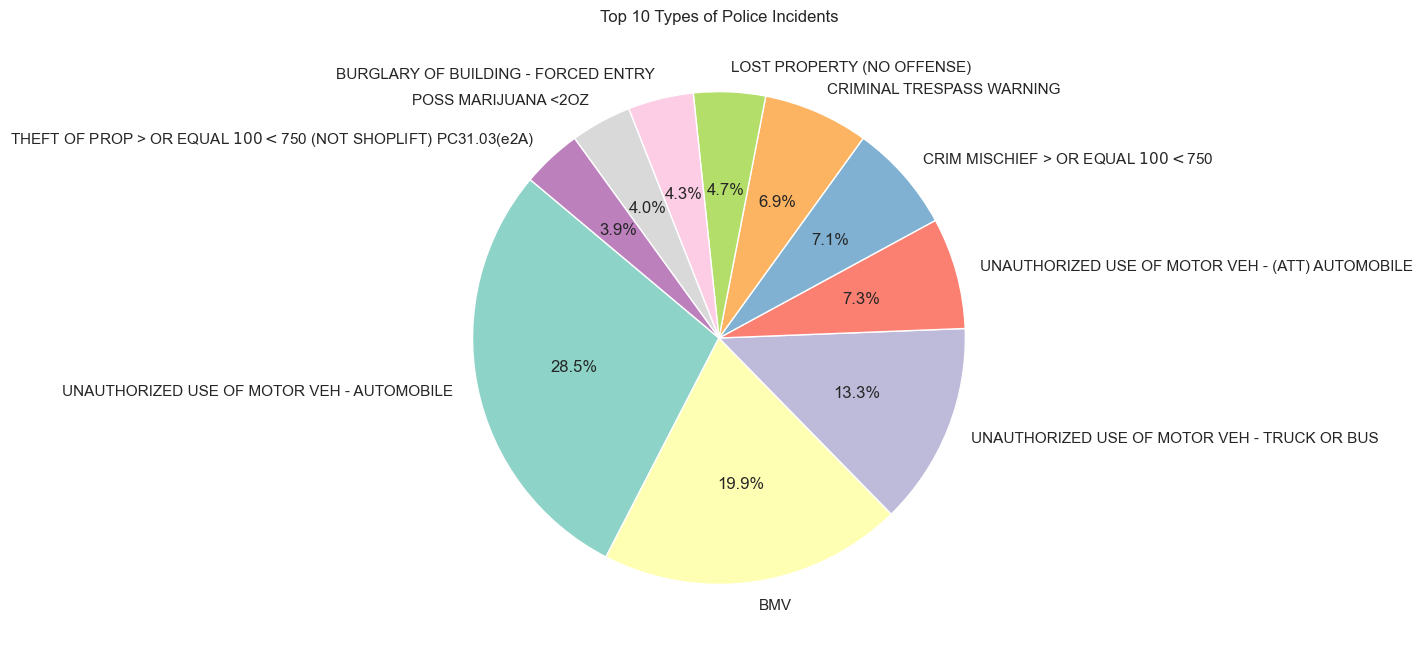

In [49]:
# Pie chart for types of incidents
# Count of incidents by type
incident_types = data['Type of Incident'].value_counts().head(10)  # Select the top 10 incident types

plt.figure(figsize=(8, 8))
plt.pie(incident_types, labels=incident_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Top 10 Types of Police Incidents')
plt.show()

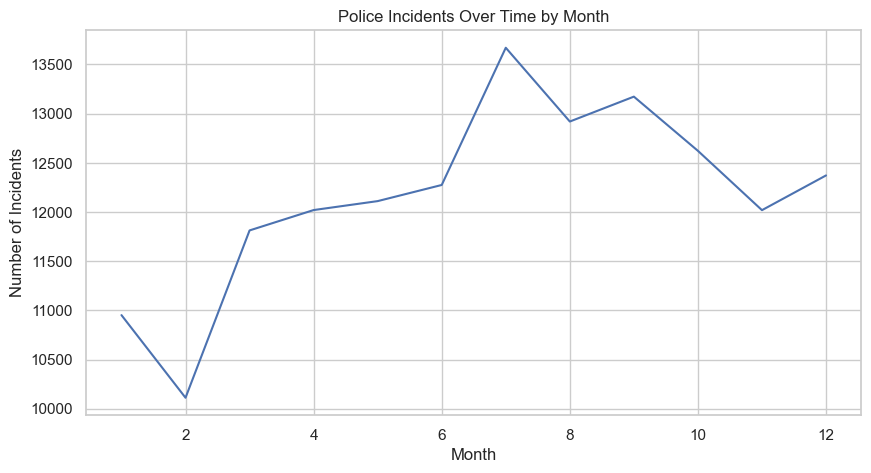

In [50]:
# Extracting month from the date column
data['Month1 of Occurence'] = pd.to_datetime(data['Date1 of Occurrence']).dt.month

# Counting incidents by month
incidents_per_month = data.groupby('Month1 of Occurence').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=incidents_per_month.index, y=incidents_per_month.values)
plt.title('Police Incidents Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

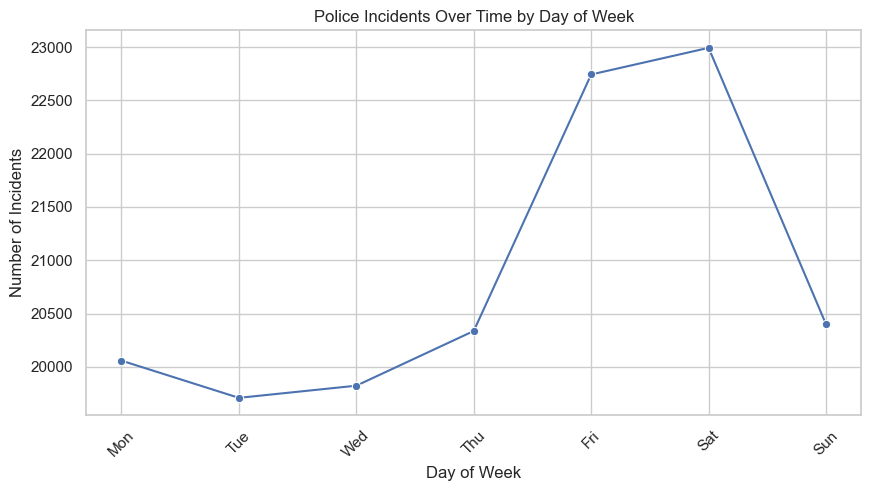

In [51]:
# Counting incidents by day of week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


incidents_per_week = data['Day1 of the Week'].value_counts().reindex(day_order)

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=incidents_per_week.index, y=incidents_per_week.values, marker='o', color='b')
plt.title('Police Incidents Over Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.grid(True)  
plt.show()

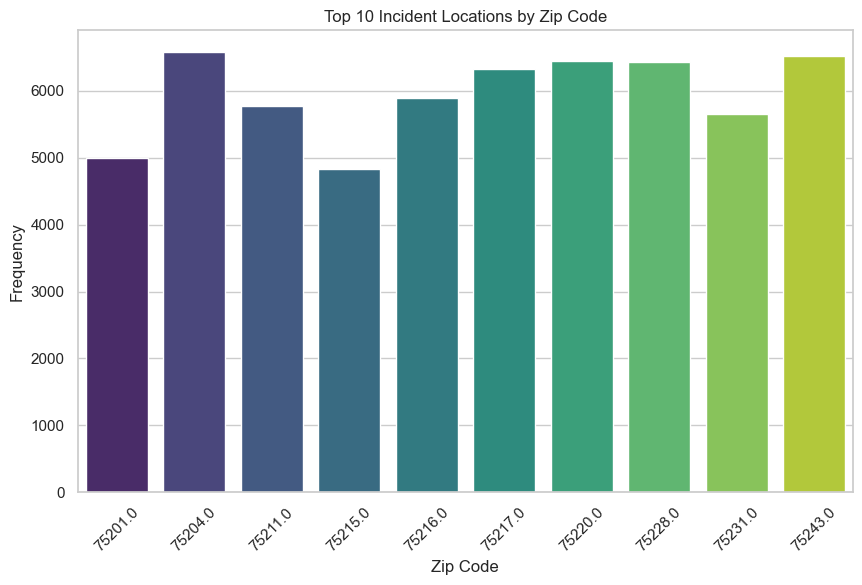

In [52]:

# Count of incidents by location (using Zip Code)
locations = data['Zip Code'].value_counts().head(10)  # Select the top 5 locations

plt.figure(figsize=(10, 6))  
sns.barplot(x=locations.index, y=locations.values, palette='viridis')
plt.title('Top 10 Incident Locations by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

